# 4.5 Confidence Estimates: the Bootstrap and the Jackknife

In [24]:
%pylab inline
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


Bootstrap:  Redraw new data from old data set with replacement.  New data set with have the same size as the old one.

For data set of size N, N! distinct redrawn samples.

With each redrawn set compute the statistic of interest

standard deviation $\sigma = \sqrt{\frac{1}{N-1} \sum_{i=1}^{N} (x_i - \overline{x})^2}$

width estimator $\sigma_G = 0.7413 (q_{75} - q_{75})$

Figure has N=1000 with 10,000 bootstraps.  Compute $\sigma$ and $\sigma_G$.

## Figure 4.3

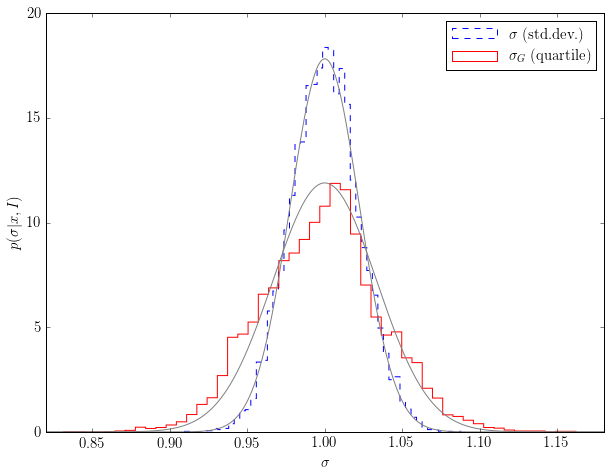

In [21]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

from astroML.resample import bootstrap
from astroML.stats import sigmaG

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=15, usetex=True)

m = 1000  # number of points
n = 10000  # number of bootstraps

#------------------------------------------------------------
# sample values from a normal distribution
np.random.seed(123)
data = norm(0, 1).rvs(m)

#------------------------------------------------------------
# Compute bootstrap resamplings of data
mu1_bootstrap = bootstrap(data, n,  np.std, kwargs=dict(axis=1, ddof=1))
mu2_bootstrap = bootstrap(data, n, sigmaG, kwargs=dict(axis=1))

#------------------------------------------------------------
# Compute the theoretical expectations for the two distributions
x = np.linspace(0.8, 1.2, 1000)

sigma1 = 1. / np.sqrt(2 * (m - 1))
pdf1 = norm(1, sigma1).pdf(x)

sigma2 = 1.06 / np.sqrt(m)
pdf2 = norm(1, sigma2).pdf(x)

#------------------------------------------------------------
# Plot the results
fig, ax = plt.subplots(figsize=(5*2, 3.75*2))

ax.hist(mu1_bootstrap, bins=50, normed=True, histtype='step',
        color='blue', ls='dashed', label=r'$\sigma\ {\rm (std. dev.)}$')
ax.plot(x, pdf1, color='gray')

ax.hist(mu2_bootstrap, bins=50, normed=True, histtype='step',
        color='red', label=r'$\sigma_G\ {\rm (quartile)}$')
ax.plot(x, pdf2, color='gray')

ax.set_xlim(0.82, 1.18)

ax.set_xlabel(r'$\sigma$',)
ax.set_ylabel(r'$p(\sigma|x,I)$')

ax.legend()

plt.show()


Jackknife:  Compute statistics with subsample of data.  

For example, when removing 1 data point from a sample of size N, there are N subsamples.

Poor for rank based statistics.

## Figure 4.4

0.597747861971 0.0313531079465
mu_1 mean: 1.00 +- 0.02
mu_2 mean: 0.60 +- 0.03


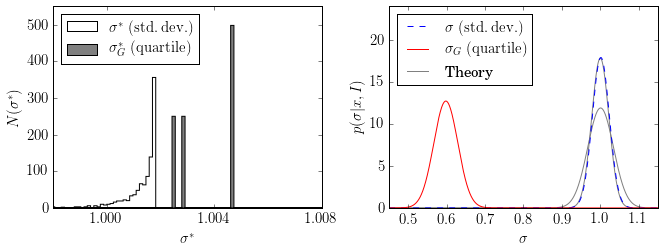

In [20]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=15, usetex=True)

#------------------------------------------------------------
# sample values from a normal distribution
np.random.seed(123)
m = 1000  # number of points
data = norm(0, 1).rvs(m)

#------------------------------------------------------------
# Compute jackknife resamplings of data
from astroML.resample import jackknife
from astroML.stats import sigmaG

# mu1 is the mean of the standard-deviation-based width
mu1, sigma_mu1, mu1_raw = jackknife(data, np.std,
                                    kwargs=dict(axis=1, ddof=1),
                                    return_raw_distribution=True)

pdf1_theory = norm(1, 1. / np.sqrt(2 * (m - 1)))
pdf1_jackknife = norm(mu1, sigma_mu1)

# mu2 is the mean of the interquartile-based width
#  WARNING: do not use the following in practice.  This example
#           shows that jackknife fails for rank-based statistics.
mu2, sigma_mu2, mu2_raw = jackknife(data, sigmaG,
                                    kwargs=dict(axis=1),
                                    return_raw_distribution=True)
pdf2_theory = norm(data.std(), 1.06 / np.sqrt(m))
pdf2_jackknife = norm(mu2, sigma_mu2)
print mu2, sigma_mu2

#------------------------------------------------------------
# plot the results
print "mu_1 mean: %.2f +- %.2f" % (mu1, sigma_mu1)
print "mu_2 mean: %.2f +- %.2f" % (mu2, sigma_mu2)

fig = plt.figure(figsize=(5*2, 2*2))
fig.subplots_adjust(left=0.11, right=0.95, bottom=0.2, top=0.9,
                    wspace=0.25)

ax = fig.add_subplot(121)
ax.hist(mu1_raw, np.linspace(0.996, 1.008, 100),
        label=r'$\sigma^*\ {\rm (std.\ dev.)}$',
        histtype='stepfilled', fc='white', normed=False)
ax.hist(mu2_raw, np.linspace(0.996, 1.008, 100),
        label=r'$\sigma_G^*\ {\rm (quartile)}$',
        histtype='stepfilled', fc='gray', normed=False)
ax.legend(loc='upper left', handlelength=2)

ax.xaxis.set_major_locator(plt.MultipleLocator(0.004))
ax.set_xlabel(r'$\sigma^*$')
ax.set_ylabel(r'$N(\sigma^*)$')
ax.set_xlim(0.998, 1.008)
ax.set_ylim(0, 550)

ax = fig.add_subplot(122)
x = np.linspace(0.45, 1.15, 1000)
ax.plot(x, pdf1_jackknife.pdf(x),
        color='blue', ls='dashed', label=r'$\sigma\ {\rm (std.\ dev.)}$',
        zorder=2)
ax.plot(x, pdf1_theory.pdf(x), color='gray', zorder=1)
ax.plot(x, pdf2_jackknife.pdf(x),
        color='red', label=r'$\sigma_G\ {\rm (quartile)}$', zorder=2)
ax.plot(x, pdf2_theory.pdf(x), color='gray', zorder=1, label='Theory')
plt.legend(loc='upper left', handlelength=2)

ax.set_xlabel(r'$\sigma$')
ax.set_ylabel(r'$p(\sigma|x,I)$')
ax.set_xlim(0.45, 1.15)
ax.set_ylim(0, 24)

plt.show()

# Hypothesis Testing

CDF of null hypothesis: $0 \leq H_0(x) \leq 1$

p value: Probability that we would get a value at least as large as $x_i$ is:

$p(x>x_i) = 1 - H(x_i)$

Threshold p value adopted, called the significance level $\alpha$, the null hypothesis is rejected when $p\leq \alpha$

Type I Error : False Positive

Type II Error: Missed sources or false negatives
    

## Simple Classification and Completeness vs. Contamination Trade-Off

underlying distribution

$h(x) = (1-a)\, h_b(x) + a \,h_s(x)$

Type I errors

$n_{spurious} = N\,(1-a) \int_{x_c}^{\infty} h_b(x) {\rm d}x$

Type II errors

$n_{missed} = N\, a \int_0^{x_c} h_s(x) {\rm d}x$

Total number of instances classified as source

$n_{source} = N \, a - n_{missed} + n_{spurious}$

sample completeness

$\eta = \frac{N \,a - n_{missed}}{N \, a}$

sample contamination

$\epsilon = \frac{n_{spurious}}{n_{source}}$


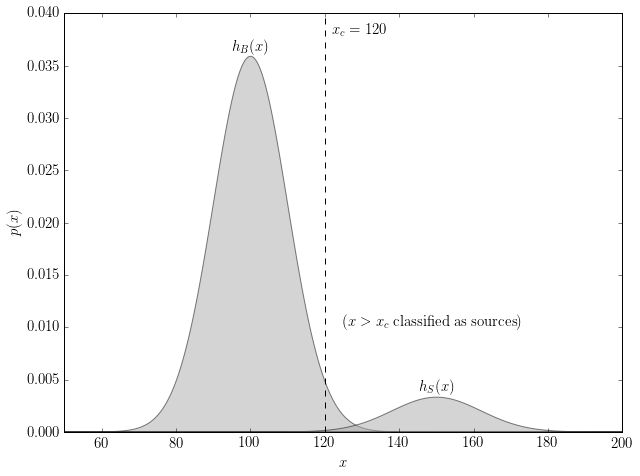

In [22]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=15, usetex=True)

#------------------------------------------------------------
# Generate and draw the curves
x = np.linspace(50, 200, 1000)
p1 = 0.9 * norm(100, 10).pdf(x)
p2 = 0.1 * norm(150, 12).pdf(x)

fig, ax = plt.subplots(figsize=(5*2, 3.75*2))
ax.fill(x, p1, ec='k', fc='#AAAAAA', alpha=0.5)
ax.fill(x, p2, '-k', fc='#AAAAAA', alpha=0.5)

ax.plot([120, 120], [0.0, 0.04], '--k')

ax.text(100, 0.036, r'$h_B(x)$', ha='center', va='bottom')
ax.text(150, 0.0035, r'$h_S(x)$', ha='center', va='bottom')
ax.text(122, 0.039, r'$x_c=120$', ha='left', va='top')
ax.text(125, 0.01, r'$(x > x_c\ {\rm classified\ as\ sources})$')

ax.set_xlim(50, 200)
ax.set_ylim(0, 0.04)

ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')
plt.show()

#### Benjamini and Hochberg Method

Assign p value to all data based on background model.  There will be an excess of low p value that correspond to the source.

If there was only background the cumulative distribution would be uniform.

Threshold:

$C(p_c) = N p_c /\epsilon_o$

# Figure 4.6

/Users/apace/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:28: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


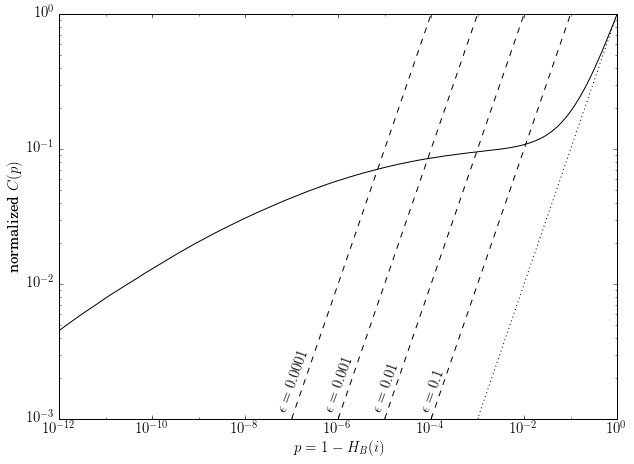

In [23]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=15, usetex=True)

#------------------------------------------------------------
# Set up the background and foreground distributions
background = norm(100, 10)
foreground = norm(150, 12)
f = 0.1

# Draw from the distribution
N = 1E6
X = np.random.random(N)
mask = (X < 0.1)
X[mask] = foreground.rvs(np.sum(mask))
X[~mask] = background.rvs(np.sum(~mask))

#------------------------------------------------------------
# Perform Benjamini-Hochberg method
p = 1 - background.cdf(X)
p_sorted = np.sort(p)

#------------------------------------------------------------
# plot the results
fig = plt.figure(figsize=(5*2, 3.75*2))
fig.subplots_adjust(bottom=0.15)
ax = plt.axes(xscale='log', yscale='log')

# only plot every 1000th; plotting all 1E6 takes too long
ax.plot(p_sorted[::1000], np.linspace(0, 1, 1000), '-k')
ax.plot(p_sorted[::1000], p_sorted[::1000], ':k', lw=1)

# plot the cutoffs for various values of expsilon
p_reg_over_eps = 10 ** np.linspace(-3, 0, 100)
for (i, epsilon) in enumerate([0.1, 0.01, 0.001, 0.0001]):
    x = p_reg_over_eps * epsilon
    y = p_reg_over_eps
    ax.plot(x, y, '--k')

    ax.text(x[1], y[1],
            r'$\epsilon = %.1g$' % epsilon,
            ha='center', va='bottom', rotation=70)

ax.xaxis.set_major_locator(plt.LogLocator(base=100))

ax.set_xlim(1E-12, 1)
ax.set_ylim(1E-3, 1)

ax.set_xlabel('$p = 1 - H_B(i)$')
ax.set_ylabel('normalized $C(p)$')

plt.show()

# 4.7 - Comparing Distributions

## Nonparametric tests

#### Kolmogorov-Smirnov Test - 
The KS test measures the maximum distance between the cumulative distriutions of two samples, or one sample and one distribution (equivalent to drawing an infinitely large sample). The relevant test statistic is

$$D = max(|F_1(x_1) - F_2(x_2)|)$$

where $F_n(x_n)$ is a cumulative distribution of sample n. If the underlying distributions being drawn from are the same, the probability of finding D larger than a given value is given by

$$Q_{KS}(\lambda) = 2 \sum\limits_{k=1}^{\infty} (-1)^{k-1}e^{-2k^2\lambda^2}$$

where 

$$\lambda = (0.12+\sqrt{n_e} +\frac{0.11}{\sqrt{n_e}})\times D$$

and 

$$n_e = \frac{N_1N_2}{N_1+N_2}$$

if D > 10, we can use 

$$D_{KS,crit} = \frac{C(\alpha)}{\sqrt{n_e}}$$

which establishes a critical D above which we reject the null hypothesis that the samples are drawn from the same distribution. This critical D depends on alpha, the probability threshold below which we reject, and inversely on sample size, such that with larger samples it becomes "easier" to reject the null hypothesis. If we are comparing a single sample to a distribution, $n_e$ becomes

$$\lim_{N_2\to\infty}n_e = N_1$$

Note that, as with many statistical tests, there is a built-in scipy package that performs the test

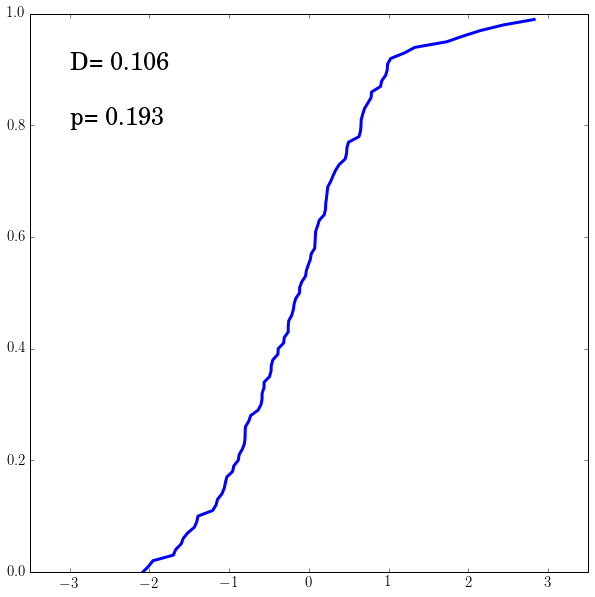

In [37]:
#1-sample KS test
N1 = 100
vals1 = np.random.normal(loc = 0,scale = 1,size = N1)
x1 = np.sort(vals1);
y1 = np.arange(0.,N1)/N1
plt.figure(figsize = (10,10))
plt.plot(x1,y1,'b-',lw = 3)
D,p = scipy.stats.kstest(vals1,"norm")
plt.text(-3,0.9,'D= '+str(D)[:5],fontsize = 24)
plt.text(-3,0.8,'p= '+str(p)[:5],fontsize = 24)
plt.xlim(-3.5,3.5);

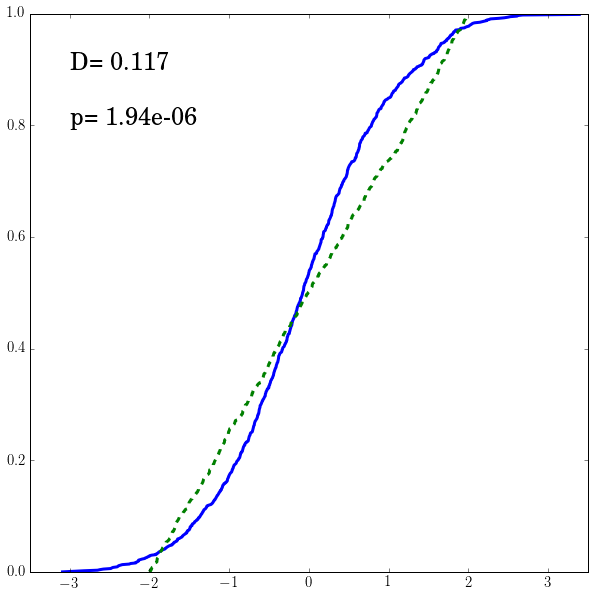

In [38]:
#2 sample KS test:
#drawing from a normal distribution
N1 = 1000
vals1 = np.random.normal(loc = 0,scale = 1,size = N1)
x1 = np.sort(vals1)
y1 = np.arange(0.,N1)/N1

#drawing from a uniform distribution
N2 = 1000
vals2 = np.random.rand(N2)*4-2
x2 = np.sort(vals2)
y2 = np.arange(0.,N2)/N2


#plotting and KS test 
plt.figure(figsize = (10,10))
plt.plot(x1,y1,'b-',lw = 3)
plt.plot(x2,y2,'g--',lw = 3)
D,p = scipy.stats.ks_2samp(vals1,vals2)
plt.text(-3,0.9,'D= '+str(D)[:5],fontsize = 24)
if str(p)[-4]=='e':
    plt.text(-3,0.8,'p= '+str(p)[:4]+str(p)[-4:],fontsize = 24)
else:
    plt.text(-3,0.8,'p= '+str(p)[:6],fontsize = 24)
plt.xlim(-3.5,3.5);

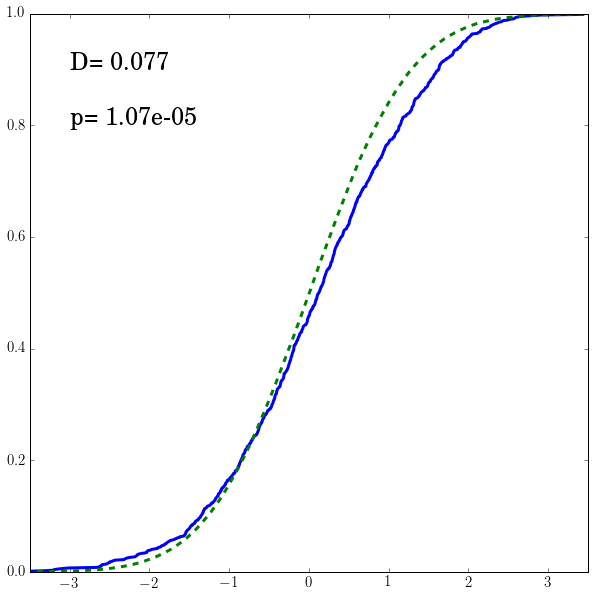

In [39]:
#Drawing from a GMM

from sklearn.mixture import GMM
N1=1000
np.random.seed(1)

gmm = GMM(3, n_iter=1)
gmm.means_ = np.array([[-1], [0], [1.5]])
gmm.covars_ = np.array([[1.5], [1], [0.5]]) ** 2
gmm.weights_ = np.array([0.1, 0.8, 0.1])

vals1 = gmm.sample(N1).T[0]
x1 = np.sort(vals1)
y1 = np.arange(0.,N1)/N1

#Drawing from a normal distribution

N2 = 100000
vals2 = np.random.normal(loc = 0,scale = 1,size = N2)
x2 = np.sort(vals2)
y2 = np.arange(0.,N2)/N2

#plotting and KS test 
plt.figure(figsize = (10,10))
plt.plot(x1,y1,'b-',lw = 3)
plt.plot(x2,y2,'g--',lw = 3)
D,p = scipy.stats.ks_2samp(vals1,vals2)
plt.text(-3,0.9,'D= '+str(D)[:5],fontsize = 24)
if str(p)[-4]=='e':
    plt.text(-3,0.8,'p= '+str(p)[:4]+str(p)[-4:],fontsize = 24)
else:
    plt.text(-3,0.8,'p= '+str(p)[:6],fontsize = 24)
plt.xlim(-3.5,3.5);

#### U test - 

The KS test is sensitive to all differences in data (e.g. location, shape, etc.). What if we want to probe differences in, say, only location? We could use the Mann-Whitney-Wilcoxen test, or U test. If we have two samples, {$x_i$} and {$y_i$}, we concatenate and sort them. Then for each $x_i$ we count the number of lower-rank $y_i$ and sum these counts. As an example, if our combined list is

$x_1,x_2,y_1,x_3,y_2,y_3,y_4,x_4$

then $U_x = 0+0+1+4 = 5$ and $U_y = 2+3+3+3 = 11$ (Notice that $U_x+U_y = N_1N_2$)

In the large sample limit, U is a Gaussian variable with $$\mu_U = \frac{N_1N_2}{2}$$ and $$\sigma_U = \sqrt{\frac{N_1N_2(N_1+N_2+1)}{12}}$$, 

If sample size is large, a quicker estimate of U may be obtained by

$$ U_x = \sum\limits_{i=1}^{N_1} \rm rank(x_i) - \frac{N_1(N_1-1)}{2}  $$

where $\rm rank$$(x_i)$ refers to the integer rank order of a given datapoint. For example, $\rm rank$$(x_3$) = 4 above.

Below we compare a the mean of two models to each other using the U test

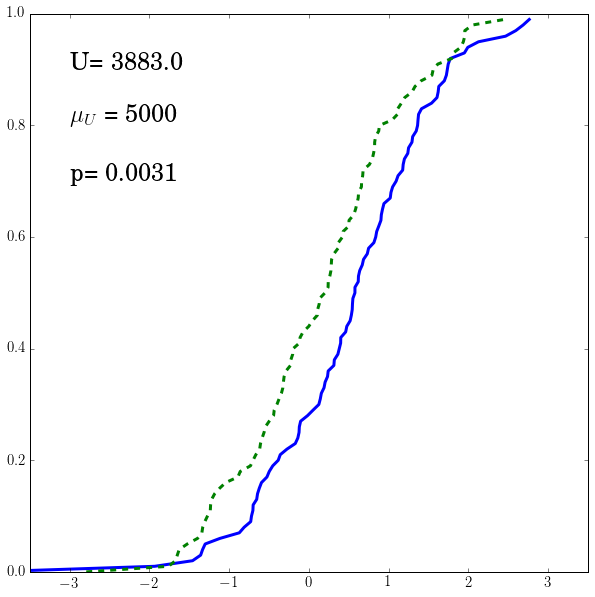

In [40]:
#Drawing from a GMM
from sklearn.mixture import GMM
N1=100
np.random.seed(1)

gmm = GMM(3, n_iter=1)
gmm.means_ = np.array([[-1], [0.5], [1.5]])
gmm.covars_ = np.array([[1.5], [1], [0.5]]) ** 2
gmm.weights_ = np.array([0.1, 0.8, 0.1])

vals1 = gmm.sample(N1).T[0]
x1 = np.sort(vals1)
y1 = np.arange(0.,N1)/N1

#Drawing from a normal distribution

N2 = 100
vals2 = np.random.normal(loc = 0,scale = 1,size = N2)
x2 = np.sort(vals2)
y2 = np.arange(0.,N2)/N2





#plotting and U test 
plt.figure(figsize = (10,10))
plt.plot(x1,y1,'b-',lw = 3)
plt.plot(x2,y2,'g--',lw = 3)
U,p = scipy.stats.mannwhitneyu(vals2,vals1)
s = str(U)
s1 = s.index('.')
plt.text(-3,0.9,'U= '+str(U)[:s1+2],fontsize = 24)
plt.text(-3,0.8,r'$\mu_U$ = '+str(N1*N2/2),fontsize = 24)
if str(p)[-4]=='e':
    plt.text(-3,0.7,'p= '+str(p)[:4]+str(p)[-4:],fontsize = 24)
else:
    plt.text(-3,0.7,'p= '+str(p)[:6],fontsize = 24)
plt.xlim(-3.5,3.5);

## Parametric Methods

Parametric tests have the benefit of being more efficient than non-parametric tests, however the gain in efficiency can be small and not worth the trade-off of needing to know the form of the underlying distribution. Nevertheless, here are two methods of comparing sample statistics if the form of the samples is known to be Gaussian.

#### t and f tests-
If the two samples have the same known $\sigma$, then the difference in the sample means, $\Delta$, is a gaussian variable, with $\mu_\Delta = 0$ and $\sigma_\Delta = \sigma \sqrt{1/N_{1}^{2} + 1/N_{2}^{2}}$.

If $\sigma$ is unknown but known to be equal between the samples, then $\sigma_\Delta =  \sqrt{s_{12}^{2}(1/N_{1} + 1/N_{2})}$, where $s_{12}$ is an estimate of the common standard deviation of the samples:

$$s_{12} = \sqrt{\frac{(N_1-1)s_{1}^{2} + (N_2-1)s_{2}^{2}}{N_1+N_2-2}}$$

where $s_{1}$ and $s_{2}$ are the sample standard deviations.

The F test compares the variance between two samples and is simply the ratio of the sample variances. Under the null hypothesis, this ratio follows a Fisher F distribution.

## Selection Effects

##### Lynden-Bell's $C^-$ method

It is often useful to, in truncated or censored data, recover the true distribution. This is easily visualized in one dimension: if $f(x)$ is the observed distribution and $s(x)$ is the selection function, then the implied true distribution is $h(x) = f(x)/s(x)$. An example of such a correction in higher dimensions is a $1/V_max$ correction frequently applied to galaxy counts (i.e. galaxies only visible nearby are weighted more heavily). A better solution is Lynden-Bell's $C^-$ method, illustrated here. We will consider the toy case of a two dimensional gaussian with a selection function defined such that S(x,y) = 1 below the line y = 12-x and S(x,y) = 0 above it.

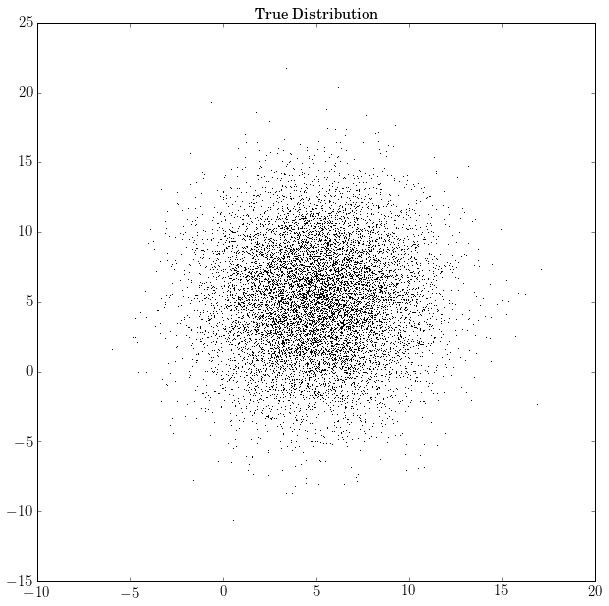

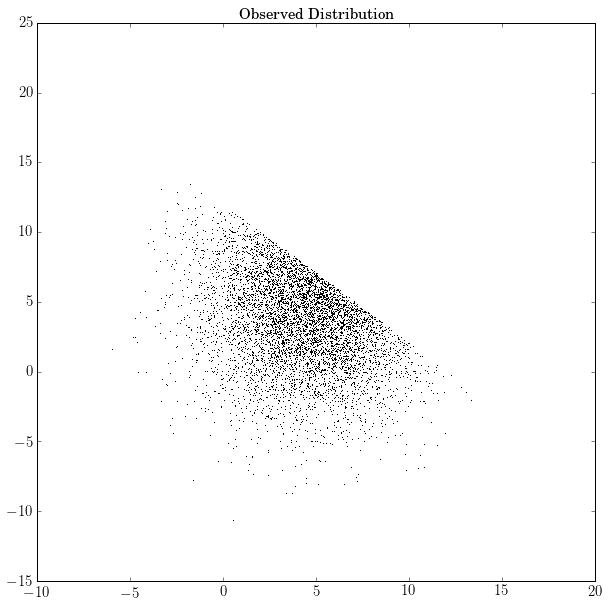

In [41]:
x_true = np.random.normal(5,3,10000)
y_true = np.random.normal(5,4,10000)
plt.figure(figsize=(10,10))
plt.plot(x_true,y_true,'k,')
plt.xlim(-10,20)
plt.ylim(-15,25)
plt.title('True Distribution')
selection_fn = y_true<12-x_true
x=x_true[selection_fn]
y=y_true[selection_fn]
plt.figure(figsize=(10,10))
plt.plot(x,y,'k,')
plt.xlim(-10,20)
plt.ylim(-15,25)
plt.title('Observed Distribution')

In order the use the method, we must determine if f(x,y) is separable, that is $f(x,y) = \psi(x)\rho(y)$. To do this, we follow the following procedure:

1. For each $x_i$, we define a set of data points $J_i$ such that every point in the set has $x_j \lt x_i$ and $y_j \lt y_{max,i}$. The number of points in this set is $N_j$.
2. Sort $J_i$ by $y_j$, giving each element in the set a rank $R_j$.
3. Define the rank of $y_i$ as $R_i$
4. If x and y are independent, $R_i$ must be distributed uniformly over $N_i$. We can define a test statistic

$$\tau = \frac{\sum_{i}^{} (R_i - N_i/2)}{\sqrt{\sum_{i}^{} N_i^2/12}}$$

If $\tau \lt 1$, x and y are independent at the $1\sigma$ level 

We do this explicitly below:

1.17680763593


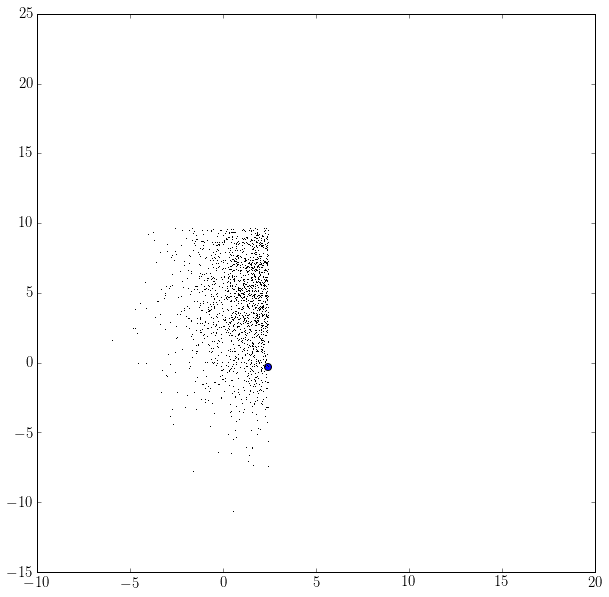

In [42]:
R,N = [],[]
for i in range(len(x)):
    y_max = 12-x[i]
    sel_J = np.array([(x[ind] <= x[i])&(y[ind] < y_max) for ind in range(len(x))])
    x_j,y_j = x[sel_J],y[sel_J]
    if i ==0:
        plt.figure(figsize=(10,10))
        plt.plot(x_j,y_j,'k,')
        plt.scatter([x[i]],[y[i]],s=49)
        plt.xlim(-10,20)
        plt.ylim(-15,25)
    y_js = np.sort(y_j)
    R_i = list(y_js).index(y[i])+1
    N_i = len(y_js)
    R.append(R_i)
    N.append(N_i)
    
tau = sum(np.array(R)*1. -np.array(N)/2.)/np.sqrt(sum((np.array(N)**2)/12))
print tau

Since $\tau \lt 1$, we see that x and y are independent. We now define the cumulative functions $\Phi(x) = \int\limits_{-\infty}^{x} \psi(x') dx'$ and $\Sigma(y) = \int\limits_{-\infty}^{y} \rho(y') dy'$. The Lyndel-Bell paper showed that $\Phi(x_i) = \Phi(x_1) \prod\limits_{k=2}^{i} (1+1/N_k)$, definied on a grid of unequal spacing given by {$x_i$}. Here we requre {$x_i$} to be sorted.

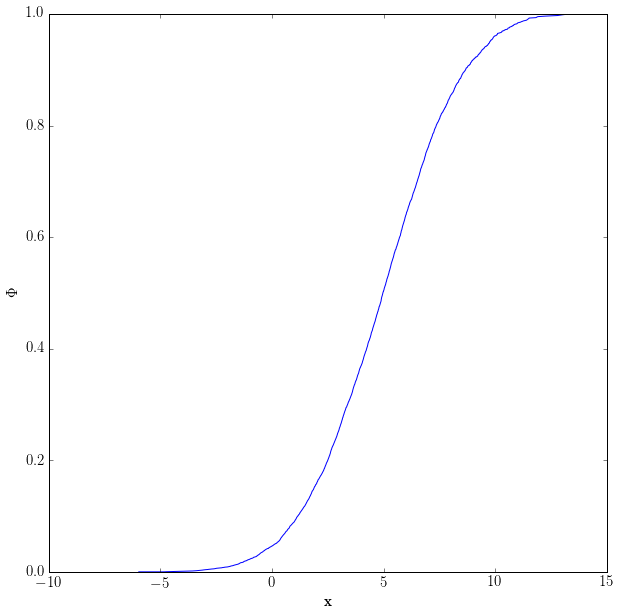

In [43]:
argy=argsort(x)
x_s =x[argy]
N_s =np.array(N)[argy]
Nk=1.+1./N_s
Nk[0] = 1
phi = np.array([prod(Nk[:i]) for i in range(len(Nk))])
phi = phi/phi[-1]
#for i in np.arange(len(x)-1)+1:
plt.figure(figsize = (10,10))
plt.plot(x_s,phi)
plt.xlabel('x');
plt.ylabel(r'$\Phi$');

To get the differential distribution function, we interpolate and bin along the x axis:

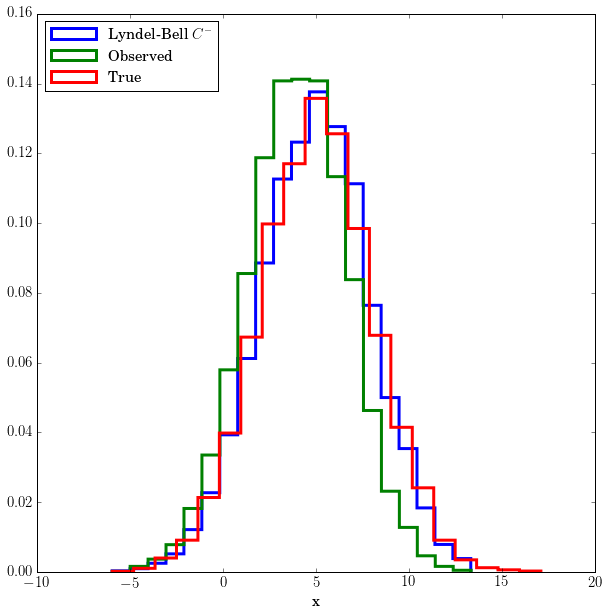

In [44]:
yp = np.arange(0,1,.0001)
xp = np.interp(yp,phi,x_s)
plt.figure(figsize = (10,10))
plt.hist(xp,normed = 1,histtype = 'step',label = 'Lyndel-Bell $C^-$',bins = 20,lw=3);
plt.hist(x,normed = 1,histtype = 'step',label = 'Observed',bins =20,lw=3);
plt.hist(x_true,normed = 1,histtype = 'step',label = 'True',bins =20,lw=3);
plt.xlabel('x');
plt.legend(loc = 2);

To find the distribution in y, we find $J_k$ such that every point in the set has $x_j \lt x_{max,i}$ and $y_j \lt y_{i}$, and the counts $M_k$ in the $J_k$s

/Users/apace/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: divide by zero encountered in divide


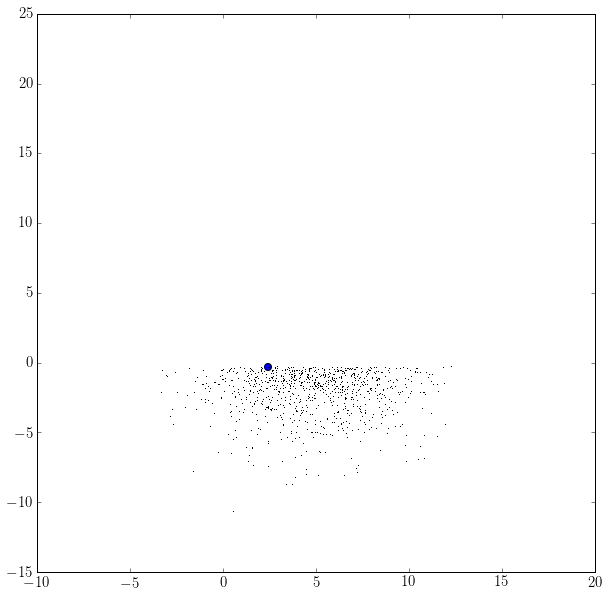

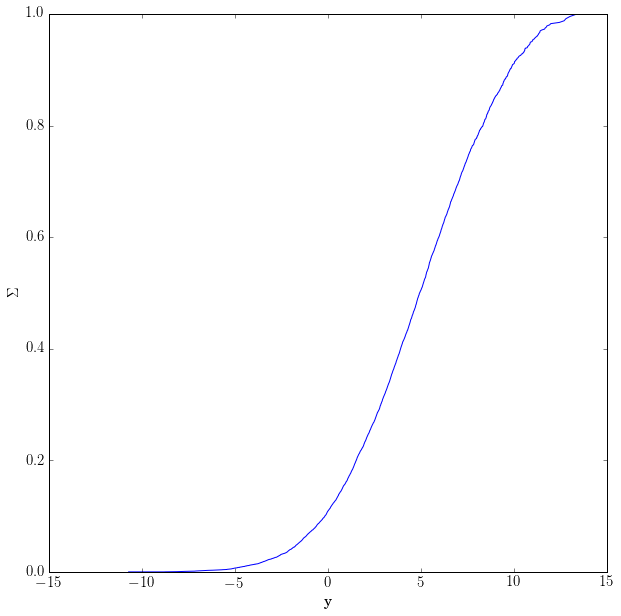

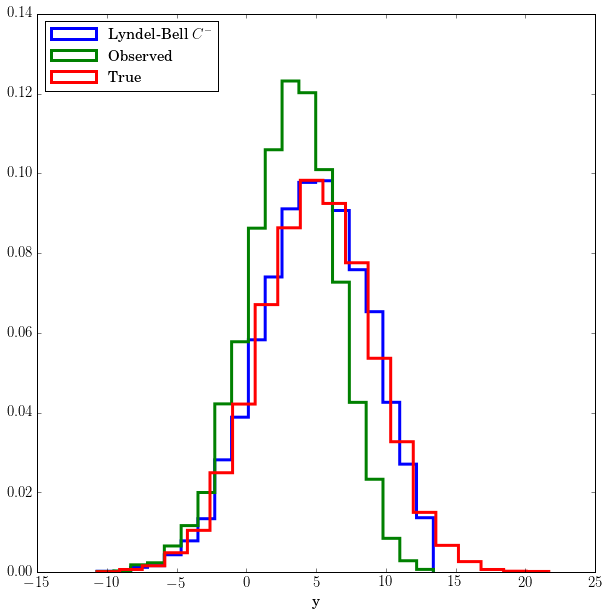

In [46]:
Rk,M = [],[]
for i in range(len(y)):
    x_max = 12-y[i]
    sel_J = np.array([(x[ind] <= x_max)&(y[ind] < y[i]) for ind in range(len(y))])
    x_j,y_j = x[sel_J],y[sel_J]
    if i ==0:
        plt.figure(figsize=(10,10))
        plt.plot(x_j,y_j,'k,')
        plt.scatter([x[i]],[y[i]],s=49)
        plt.xlim(-10,20)
        plt.ylim(-15,25)
    M_k = len(y_j)
    M.append(M_k)
argy=argsort(y)
y_s =y[argy]
M_s =np.array(M)[argy]
Mk=1.+1./M_s
Mk[0] = 1
sigma= np.array([prod(Mk[:i]) for i in range(len(Nk))])
sigma = sigma/sigma[-1]
#for i in np.arange(len(x)-1)+1:
plt.figure(figsize = (10,10))
plt.plot(y_s,sigma)
plt.xlabel('y');
plt.ylabel(r'$\Sigma$');
yp = np.arange(0,1,.0001)
xp = np.interp(yp,sigma,y_s)
plt.figure(figsize = (10,10))
plt.hist(xp,normed = 1,histtype = 'step',label = 'Lyndel-Bell $C^-$',bins = 20,lw=3);
plt.hist(y,normed = 1,histtype = 'step',label = 'Observed',bins =20,lw=3);
plt.hist(y_true,normed = 1,histtype = 'step',label = 'True',bins =20,lw=3);
plt.xlabel('y');
plt.legend(loc = 2);